In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
data=pd.read_csv('creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.shape

(61491, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61491 entries, 0 to 61490
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    61491 non-null  int64  
 1   V1      61491 non-null  float64
 2   V2      61491 non-null  float64
 3   V3      61491 non-null  float64
 4   V4      61491 non-null  float64
 5   V5      61491 non-null  float64
 6   V6      61491 non-null  float64
 7   V7      61491 non-null  float64
 8   V8      61491 non-null  float64
 9   V9      61491 non-null  float64
 10  V10     61491 non-null  float64
 11  V11     61491 non-null  float64
 12  V12     61491 non-null  float64
 13  V13     61491 non-null  float64
 14  V14     61491 non-null  float64
 15  V15     61491 non-null  float64
 16  V16     61491 non-null  float64
 17  V17     61491 non-null  float64
 18  V18     61491 non-null  float64
 19  V19     61491 non-null  float64
 20  V20     61491 non-null  float64
 21  V21     61491 non-null  float64
 22

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61491 entries, 0 to 61490
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    61491 non-null  int64  
 1   V1      61491 non-null  float64
 2   V2      61491 non-null  float64
 3   V3      61491 non-null  float64
 4   V4      61491 non-null  float64
 5   V5      61491 non-null  float64
 6   V6      61491 non-null  float64
 7   V7      61491 non-null  float64
 8   V8      61491 non-null  float64
 9   V9      61491 non-null  float64
 10  V10     61491 non-null  float64
 11  V11     61491 non-null  float64
 12  V12     61491 non-null  float64
 13  V13     61491 non-null  float64
 14  V14     61491 non-null  float64
 15  V15     61491 non-null  float64
 16  V16     61491 non-null  float64
 17  V17     61491 non-null  float64
 18  V18     61491 non-null  float64
 19  V19     61491 non-null  float64
 20  V20     61491 non-null  float64
 21  V21     61491 non-null  float64
 22

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,61491.000000,61491.000000,61491.000000,61491.000000,61491.000000,61491.000000,61491.000000,61491.000000,61491.000000,61491.000000,...,61491.000000,61491.000000,61491.000000,61491.000000,61491.000000,61491.000000,61491.000000,61491.000000,61490.000000,61490.000000
mean,32315.344034,-0.237271,-0.009245,0.686906,0.170027,-0.262238,0.102613,-0.115160,0.057488,0.053122,...,-0.028080,-0.107424,-0.040104,0.005970,0.136116,0.020139,0.002365,0.004510,95.434437,0.002651
std,13799.588573,1.858811,1.650873,1.437527,1.382308,1.387481,1.305512,1.246739,1.191802,1.178365,...,0.721260,0.636939,0.592219,0.596774,0.438555,0.498542,0.382815,0.323475,268.645764,0.051418
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,26758.500000,-0.994568,-0.583205,0.201620,-0.725042,-0.881361,-0.636372,-0.604834,-0.144080,-0.654524,...,-0.228062,-0.527888,-0.179959,-0.325959,-0.128081,-0.329703,-0.063341,-0.006118,7.680000,0.000000
50%,36064.000000,-0.244368,0.075028,0.778314,0.184554,-0.295113,-0.150753,-0.074302,0.063124,-0.048761,...,-0.063048,-0.082467,-0.052011,0.061264,0.173929,-0.075671,0.009102,0.022644,26.000000,0.000000
75%,42644.000000,1.154727,0.731859,1.411352,1.052198,0.276515,0.492695,0.424238,0.339268,0.718936,...,0.113660,0.308504,0.078764,0.402787,0.422744,0.297594,0.082455,0.076347,87.680000,0.000000
max,49863.000000,1.960497,18.183626,4.101716,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.201701,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.345232,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.054280,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.104471,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.094714,0.0


In [ ]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.201701,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.345232,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.054280,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.104471,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.094714,0.0


In [ ]:
data.duplicated().any()

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data['Class'].value_counts()

0.0    60008
1.0      163
Name: Class, dtype: int64

In [ ]:
fraud_cases=len(data[data['Class']==1])

In [ ]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 163


<Axes: ylabel='count'>

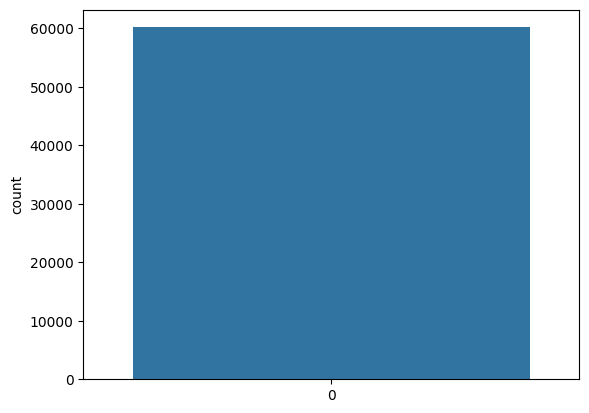

In [ ]:
import seaborn as sns
sns.countplot(data['Class'])

In [ ]:
X = data.drop('Class',axis=1)
y = data['Class']

In [ ]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [ ]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(60008, 30)
(163, 30)


In [ ]:
legit.Amount.describe()

count    60008.000000
mean         0.005227
std          1.008256
min         -0.355246
25%         -0.325652
50%         -0.253252
75%         -0.023952
max         72.814305
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count    163.000000
mean      -0.008641
std        0.833964
min       -0.355246
25%       -0.351523
50%       -0.338271
75%        0.016958
max        6.381115
Name: Amount, dtype: float64

In [ ]:
data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,-0.237427,-0.026896,0.727384,0.156456,-0.258800,0.091779,-0.089328,0.042906,0.050807,-0.022692,...,0.049037,-0.029921,-0.104818,-0.039598,-0.000135,0.130958,0.020481,0.001643,0.004130,0.005227
1.0,-7.056144,5.067518,-9.516816,5.526487,-5.205203,-2.148640,-7.428797,3.415973,-3.338006,-7.044203,...,0.421982,0.850389,-0.198696,-0.261889,-0.079897,0.238777,0.121180,0.560332,0.035769,-0.008641


In [ ]:
legit_sample = legit.sample(n=3)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47774,0.510215,-1.392915,0.211221,0.955434,-1.251567,-0.520239,0.195175,-0.234539,-1.208905,0.636911,...,0.011828,-0.282652,-0.280750,0.597045,0.288533,-0.324992,-0.009820,0.097537,1.115104,0.0
40323,-2.514132,-3.298636,1.442359,-1.598434,0.603521,-1.854154,-0.694881,0.065849,-2.605633,0.791450,...,0.235231,-0.085763,0.674857,0.479313,0.811347,-0.172587,-0.143169,0.105041,0.616302,0.0
5460,-0.809930,0.623895,2.641249,1.272183,-0.505820,1.022814,0.339408,-0.248390,1.878240,0.228398,...,-0.100430,0.449592,-0.043866,0.163676,-0.660021,-0.475619,-0.619958,-0.284938,-0.076065,0.0
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.355246,1.0
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.613906,1.0


In [ ]:
new_dataset.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
57470,0.364377,1.443523,-2.220907,2.036985,-1.237055,-1.728161,-2.058582,0.358895,-1.393306,-3.505790,...,0.402730,-0.132129,-0.032977,0.460861,0.560404,0.409366,0.539668,0.296918,-0.352417,1.0
57615,-1.232804,2.244119,-1.703826,1.492536,-1.192985,-1.686110,-1.864612,0.856122,-1.973535,-3.942383,...,0.560475,0.165682,-0.013754,0.474935,-0.218725,0.302809,0.466031,0.250134,-0.352417,1.0
58422,-2.790771,-1.464269,1.031165,1.921356,-0.090014,-0.483871,0.780731,-0.348776,0.609133,0.225934,...,-0.392667,0.440020,0.777659,0.418552,0.244563,-0.159361,0.060540,0.356958,0.421174,1.0
58761,1.243848,0.524526,-0.538884,1.209196,0.479538,-0.197429,0.049166,0.037792,0.128119,-0.552903,...,-0.051660,-0.084089,-0.192846,-0.917392,0.681953,-0.194419,0.045917,0.040136,-0.351523,1.0
59539,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,-2.495619,...,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,-0.281803,1.0


In [ ]:
new_dataset['Class'].value_counts()

1.0    163
0.0      3
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,-0.937949,-1.355885,1.431609,0.209728,-0.384622,-0.450526,-0.053433,-0.139027,-0.645432,0.552253,...,0.294911,0.048876,0.027059,0.116747,0.413345,0.146620,-0.324399,-0.257649,-0.027453,0.551780
1.0,-7.056144,5.067518,-9.516816,5.526487,-5.205203,-2.148640,-7.428797,3.415973,-3.338006,-7.044203,...,0.421982,0.850389,-0.198696,-0.261889,-0.079897,0.238777,0.121180,0.560332,0.035769,-0.008641


**Split the data**

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

             V1        V2        V3        V4        V5        V6        V7  \
47774  0.510215 -1.392915  0.211221  0.955434 -1.251567 -0.520239  0.195175   
40323 -2.514132 -3.298636  1.442359 -1.598434  0.603521 -1.854154 -0.694881   
5460  -0.809930  0.623895  2.641249  1.272183 -0.505820  1.022814  0.339408   
541   -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
623   -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823  0.325574   
...         ...       ...       ...       ...       ...       ...       ...   
57470  0.364377  1.443523 -2.220907  2.036985 -1.237055 -1.728161 -2.058582   
57615 -1.232804  2.244119 -1.703826  1.492536 -1.192985 -1.686110 -1.864612   
58422 -2.790771 -1.464269  1.031165  1.921356 -0.090014 -0.483871  0.780731   
58761  1.243848  0.524526 -0.538884  1.209196  0.479538 -0.197429  0.049166   
59539 -2.139051  1.394368 -0.612035  1.049327 -1.162102 -0.768219 -1.997237   

             V8        V9       V10  ...       V20 

In [ ]:
print(Y)

47774    0.0
40323    0.0
5460     0.0
541      1.0
623      1.0
        ... 
57470    1.0
57615    1.0
58422    1.0
58761    1.0
59539    1.0
Name: Class, Length: 166, dtype: float64


In [ ]:
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Predict the data**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Accuracy: 0.93
Model Coefficients: [[2.1356552  1.31289783]]
Model Intercept: [0.30770378]
